## (week 2) Fundamentals of Quantitative Modeling  by University of Pennsylvania
#### Muhammad Kevin Alrahmanto (19/445592/PA/19416, Universitas Gadjah Mada)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Linear Models

## 1.1 The cost function and the time-to-produce function

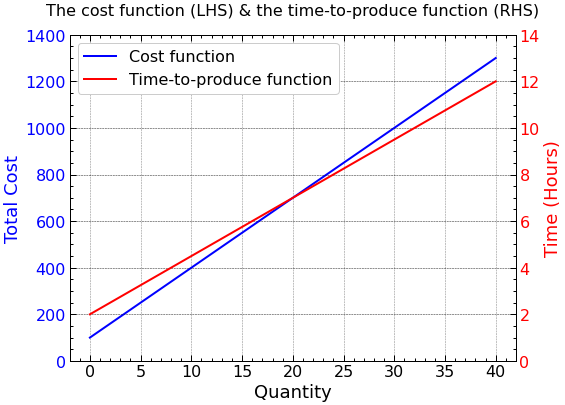

In [2]:
def f_cost(quantity):
    return 100+30*quantity

def f_time_to_produce(quantity):
    return 2+0.25*quantity

x=np.linspace(0, 40, 3)
fig, ax1 = plt.subplots()
ax1.plot(x,f_cost(x), lw=2, color='blue', label='Cost function')
ax1.set_ylabel('Total Cost', fontsize=18, color='blue')
ax1.set_xlabel('Quantity', fontsize=18)
ax1.set_title('The cost function (LHS) & the time-to-produce function (RHS)', pad=20)
ax1.set_yticks(np.linspace(ax1.get_yticks()[0], ax1.get_yticks()[-1], len(ax1.get_yticks())))
for label in ax1.get_yticklabels():
    label.set_color('blue')

ax2=ax1.twinx()
ax2.plot(x, f_time_to_produce(x), lw=2, color='red', ls='-', label='Time-to-produce function')
ax2.set_ylabel('Time (Hours)', fontsize=18, color='red')
ax2.set_yticks(np.linspace(ax2.get_yticks()[0], ax2.get_yticks()[-1], len(ax1.get_yticks())))
for label in ax2.get_yticklabels():
    label.set_color('red')

fig.legend(loc="upper left", bbox_to_anchor=(0,1), bbox_transform=ax1.transAxes)
plt.show()

# 2. Growth and decay in discrete time

## 2.1 Simple Interest

In [3]:
principal=100
rate=0.1
simple_int=pd.DataFrame({'Year': list(range(0,11)), 
                   'Value': [principal*(1+rate*year) for year in range(0,11)]})
simple_int.set_index('Year').T

Year,0,1,2,3,4,5,6,7,8,9,10
Value,100.0,110.0,120.0,130.0,140.0,150.0,160.0,170.0,180.0,190.0,200.0


## 2.2 Compound interest

In [4]:
principal=100
rate=0.1
compound_int=pd.DataFrame({'Year': list(range(0,11)), 
                   'Value': [np.round(principal*(1+rate)**year,2) for year in range(0,11)]})
compound_int.set_index('Year').T

Year,0,1,2,3,4,5,6,7,8,9,10
Value,100.0,110.0,121.0,133.1,146.41,161.05,177.16,194.87,214.36,235.79,259.37


## 2.3 Simple interest vs Compound interest

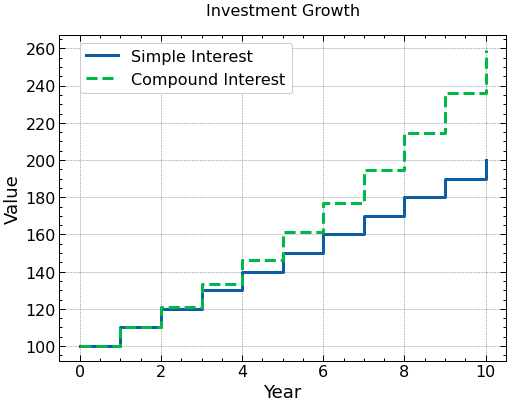

In [5]:
fig,ax = plt.subplots()
ax.step(simple_int['Year'], simple_int['Value'], where='post', lw=3, label ='Simple Interest')
ax.step(compound_int['Year'], compound_int['Value'], where='post', lw=3, ls='--', label='Compound Interest')
ax.set_ylabel('Value', fontsize=18)
ax.set_xlabel('Year', fontsize=18)
ax.set_title('Investment Growth', pad=20)

fig.legend(loc="upper left", bbox_to_anchor=(0,0.97), bbox_transform=ax1.transAxes)
plt.show()

## 2.4 Special case: Annual fish catch

- An Indian Ocean nation caught 200,000 tonnes of fish this year
- The catch is projected to fall by a constant 5% factor each year for the next 10 years
- How many fish are predicted to be caught 5 years from now?

In [6]:
initial_amount=200000
rate=0.05
pred_catch=pd.DataFrame({'Year': list(range(0,6)), 
                   'Catch': [np.round(initial_amount*(1-rate)**year,2) for year in range(0,6)]})
pred_catch=pred_catch.set_index('Year')
pred_catch['Cummulative catch']=np.cumsum(pred_catch['Catch'])
pred_catch

,Catch,Cummulative catch
Year,,
0,200000.00,200000.00
1,190000.00,390000.00
2,180500.00,570500.00
3,171475.00,741975.00
4,162901.25,904876.25
5,154756.19,1059632.44


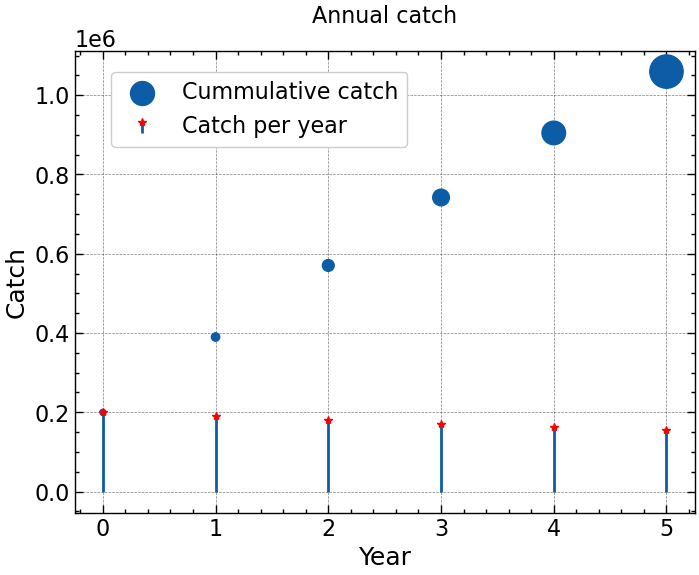

In [18]:
fig, ax=plt.subplots()

ax.scatter(pred_catch.index, pred_catch['Cummulative catch'], s=[18*2**n for n in range(len(pred_catch.index))],label='Cummulative catch')
ax.stem(pred_catch.index, pred_catch['Catch'], markerfmt='r*',label ='Catch per year',basefmt=" " )
ax.set_ylabel('Catch', fontsize=18)
ax.set_xlabel('Year', fontsize=18)
ax.set_title('Annual catch', pad=20)

fig.legend(loc="upper left", bbox_to_anchor=(0,0.97), bbox_transform=ax1.transAxes)
plt.show()


## 2.5 Sum of the Geometric Series

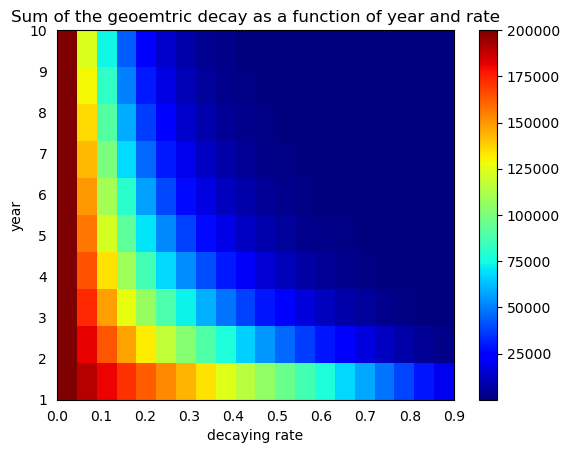

In [20]:
initial_value=200000
def sum_series(rate, year):
    return initial_value*((1-rate)**(1+year)/(1-rate))

rate = np.linspace(0, 0.9, num = 20)
year = np.arange(1,11)
X, Y = np.meshgrid(rate, year)
Z = sum_series(X, Y)
plt.imshow(Z, cmap = "jet", extent = [0, 0.9, 1, 10], origin = "lower", aspect='auto')

plt.xlabel('decaying rate')
plt.ylabel('year')
plt.title('Sum of the geoemtric decay as a function of year and rate')
plt.tick_params(bottom = False, left=False)
plt.colorbar()
plt.show()

# 3. Growth and decay in continuous time

## 3.1 Continuous compounding

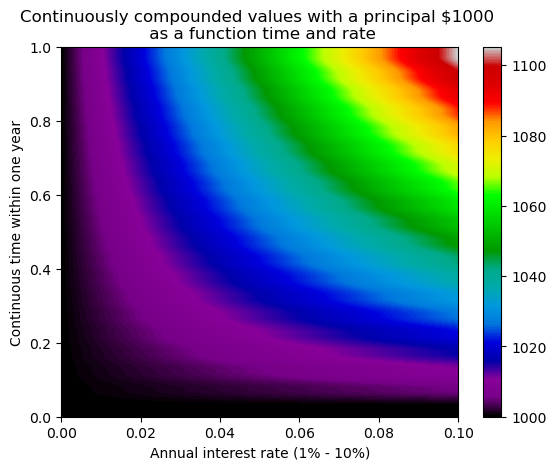

In [21]:
principal=1000
def con_com(time, rate):
    return principal*np.exp(rate*time)

time_span=np.linspace(0,0.1, 999)
con_rate=np.linspace(0,1, 20)
X, Y = np.meshgrid(time_span, con_rate)
Z = con_com(X, Y)
plt.imshow(Z, cmap = "nipy_spectral", extent = [0, 0.1, 0, 1], origin = "lower", aspect='auto')

plt.xlabel('Annual interest rate (1% - 10%)')
plt.ylabel('Continuous time within one year')
plt.title('Continuously compounded values with a principal $1000 \n as a function time and rate')

plt.colorbar()
plt.show()

## 3.2 Graphing the epidemic

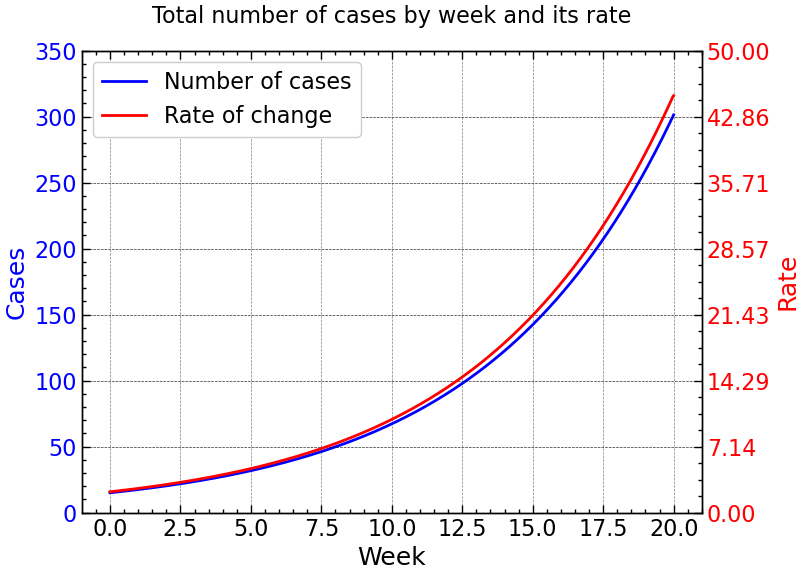

In [10]:
def epidemic(week):
    return 15*np.exp(0.15*week)
x=np.linspace(0, 20, 999)
y=epidemic(x)
dydx=np.gradient(y, x)

fig, ax1 = plt.subplots()
ax1.plot(x,y, lw=2, color='blue', label='Number of cases')
ax1.set_ylabel('Cases', fontsize=18, color='blue')
ax1.set_xlabel('Week', fontsize=18)
ax1.set_title('Total number of cases by week and its rate', pad=20)
ax1.set_yticks(np.linspace(ax1.get_yticks()[0], ax1.get_yticks()[-1], len(ax1.get_yticks())))
for label in ax1.get_yticklabels():
    label.set_color('blue')

ax2=ax1.twinx()
ax2.plot(x, dydx, lw=2, color='red', ls='-', label='Rate of change')
ax2.set_ylabel('Rate', fontsize=18, color='red')
ax2.set_yticks(np.linspace(ax2.get_yticks()[0], ax2.get_yticks()[-1], len(ax1.get_yticks())))
for label in ax2.get_yticklabels():
    label.set_color('red')

fig.legend(loc="upper left", bbox_to_anchor=(0,1), bbox_transform=ax1.transAxes)
plt.show()

# 4. Optimization

## 4.1 Demand Model Brute Force Approach

In [11]:
def quantity(price):
    return 60000*price**(-2.5)
def profit(price):
    C=2 #price of production for each unit is constant
    return quantity(price)*(price-C)

bf_approach = pd.DataFrame({"Price": np.arange(1.5,5.1, 0.25)})
bf_approach['Profit']=bf_approach['Price'].apply(profit)
bf_approach.set_index('Price', inplace=True)

In [12]:
bf_approach

,Profit
Price,
1.50,-10886.621079
1.75,-3702.509123
2.00,0.000000
2.25,1975.308642
2.50,3035.786554
2.75,3588.234183
3.00,3849.001795
3.25,3938.699618
3.50,3927.103963


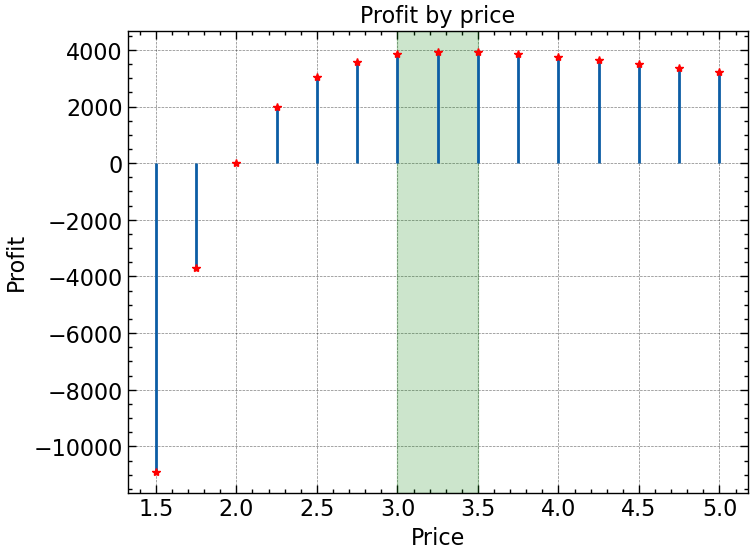

In [13]:
plt.stem(bf_approach.index, bf_approach['Profit'], markerfmt='r*',label ='Catch per year',basefmt=" " )
plt.xlabel('Price')
plt.ylabel('Profit')
plt.title('Profit by price')
plt.axvspan(3, 3.5, alpha=0.2, color='green')
plt.show()

## 4.2 Demand Model Calculus Approach

In [14]:
from scipy.optimize import fmin
max_price = fmin(lambda price: -profit(price), 2.5)
print(f'The price to maximize the profit is {np.round(max_price[-1],2)}, the quantity is {np.round(quantity(max_price[-1]),2)}, and the profit is {np.round(profit(max_price[-1]),2)}')

Optimization terminated successfully.
         Current function value: -3943.602414
         Iterations: 16
         Function evaluations: 32
The price to maximize the profit is 3.33, the quantity is 2957.75, and the profit is 3943.6


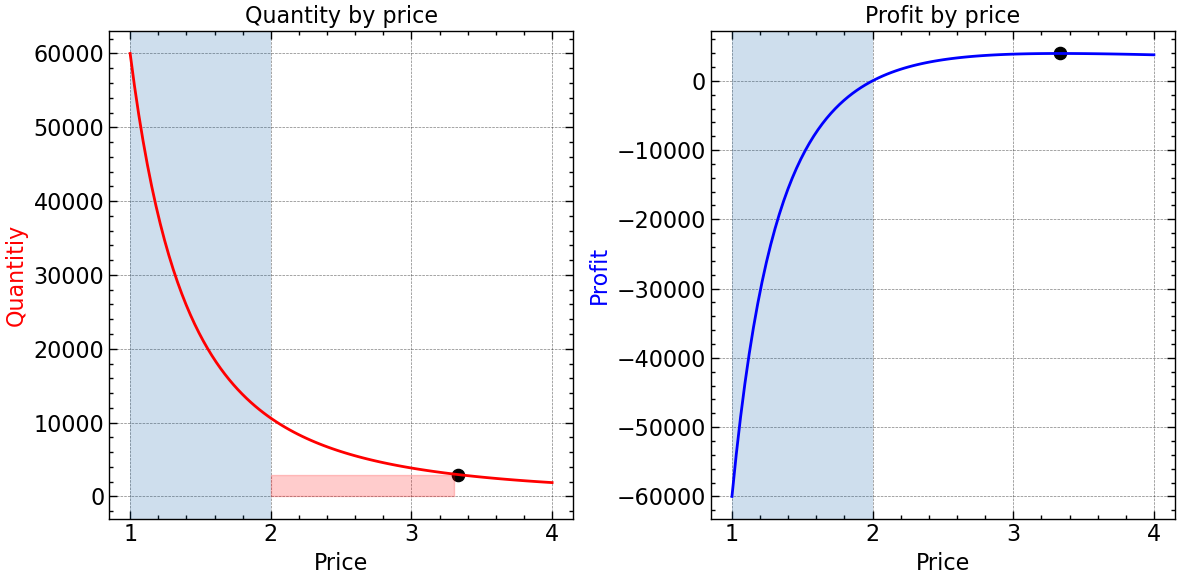

In [15]:
price=np.linspace(1, 4, 99)
fig, axes= plt.subplots(1, 2, figsize=(12,6))

axes[0].plot(price,quantity(price), c='r')
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Quantitiy', c='r')
axes[0].set_title('Quantity by price')
axes[0].scatter(max_price[-1],quantity(max_price[-1]), c='black', s=77)
axes[0].axvspan(1, 2, alpha=0.2)
axes[0].fill_between([2,3.3], 0, quantity(max_price[-1]), alpha=0.2, color='red')

axes[1].plot(price, profit(price), c='b')
axes[1].set_xlabel('Price')
axes[1].set_ylabel('Profit', c='b')
axes[1].set_title('Profit by price')
axes[1].scatter(max_price[-1],profit(max_price[-1]), c='black', s=77)
axes[1].axvspan(1, 2, alpha=0.2)

plt.tight_layout()
plt.show()